Лабораторная работа 2

Импорт необходимых библиотек и данных

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as st
from scipy import stats

df = pd.read_csv('Data/train.csv')

Задание 1: Определение типа шкалы измерения  
Создайте список, состоящий из различных типов данных (например, возраст, пол, уровень образования, зарплата и т.д.). Затем создайте функцию на Python, которая будет проходить через каждый элемент этого списка и определять тип шкалы измерения (номинальная, порядковая, интервальная, отношения).

In [32]:
test_list = df[['PassengerId', 'Sex', 'Name', 'Age', 'Ticket', 'Pclass', 'Fare']].values[0]
print(test_list)

nominal_scale = [df['Sex'].values, df['Name'].values, df['Ticket'].values]
ordinal_scale = [df['Pclass'].values, df['PassengerId'].values]
interval_scale = [df['Fare'].values]
ratio_scale = [df['Age'].values]

def type_of_scale(list):
    scales = []
    for i, element in enumerate(list):
        if np.isin(list[i], nominal_scale):
            scales.append('Номинальная шкала')
        elif np.isin(list[i], ordinal_scale) & isinstance(list[i], int):
            scales.append('Порядковая шкала')
        elif np.isin(list[i], interval_scale) & isinstance(list[i], float):
            scales.append('Интервальная шкала')
        elif np.isin(list[i], ratio_scale) & isinstance(list[i], float):
            scales.append('Шкала отношений')
        else: 
            scales.append('Иная шкала')
    
    return scales

print(type_of_scale(test_list))

[1 'male' 'Braund, Mr. Owen Harris' 22.0 'A/5 21171' 3 7.25]
['Порядковая шкала', 'Номинальная шкала', 'Номинальная шкала', 'Шкала отношений', 'Номинальная шкала', 'Порядковая шкала', 'Интервальная шкала']


Задание 2: Приведение данных к нужной шкале  
Создайте датафрейм с данными, которые необходимо привести к номинальной или порядковой шкале. Создайте функцию на Python, которая преобразует эти данные в нужные шкалы.

In [33]:
unconverted_dataframe = df[['PassengerId', 'Sex', 'Name', 'Age', 'Ticket', 'Pclass', 'Fare']]
print('Типы до приведения:\n', unconverted_dataframe.dtypes)

def convert_scales(data):
    nominal = ['Sex', 'Name', 'Ticket']
    ordinal = ['PassengerId', 'Pclass']
    data = data.copy()
    for column in data.columns:
        if column in ordinal:
            data[column] = pd.Categorical(data[column], ordered=True)
        elif column in nominal:
            data[column] = pd.Categorical(data[column])
    return data

converted_dataframe = convert_scales(unconverted_dataframe)
print('\nТипы после приведения:\n', converted_dataframe.dtypes)

Типы до приведения:
 PassengerId      int64
Sex             object
Name            object
Age            float64
Ticket          object
Pclass           int64
Fare           float64
dtype: object

Типы после приведения:
 PassengerId    category
Sex            category
Name           category
Age             float64
Ticket         category
Pclass         category
Fare            float64
dtype: object


Задание 3: Анализ данных с использованием различных шкал измерения  
Создайте датафрейм с данными различных типов (к примеру, пол, возраст, уровень образования, баллы за тест). Проанализируйте эти данные с использованием функций Python, которые соответствуют типу шкалы каждого элемента данных (например, мода для номинальной шкалы, медиана для порядковой шкалы, среднее значение для интервальной и отношения).

In [35]:
dataframe_task3 = df[['PassengerId', 'Sex', 'Name', 'Age', 'Ticket', 'Pclass', 'Fare']]

def analyze_data(data):
    result = {}
    nominal = ['Sex', 'Name', 'Ticket']
    ordinal = ['PassengerId', 'Pclass']
    data = data.copy()
    for column in data.columns:
        if column in nominal:
            result[column] = st.mode(data[column])
        elif column in ordinal:
            result[column] = st.median(data[column])
        else:
            result[column] = st.mean(data[column][~np.isnan(data[column])])
    return result

results = analyze_data(dataframe_task3)
for key, value in results.items():
    print(f"{key}: {value}")

mode = st.mode(dataframe_task3['Sex'])
print('Мода для номинальной шкалы (столбец "Пол"):', mode)

mean_age = st.mean(dataframe_task3['Age'][~np.isnan(dataframe_task3['Age'])])
print('Cреднее значение для шкалы отношения (столбец "Возраст"):', mean_age)

median = st.median(dataframe_task3['Pclass'])
print('Медиана для порядковой шкалы (столбец "Класс"):', median)

mean_fare = st.mean(dataframe_task3['Fare'])
print('Cреднее значение для интервальной шкалы (столбец "Стоимость билета"):', mean_fare)

PassengerId: 446
Sex: male
Name: Braund, Mr. Owen Harris
Age: 29.699117647058824
Ticket: 347082
Pclass: 3
Fare: 32.204207968574636
Мода для номинальной шкалы (столбец "Пол"): male
Cреднее значение для шкалы отношения (столбец "Возраст"): 29.699117647058824
Медиана для порядковой шкалы (столбец "Класс"): 3
Cреднее значение для интервальной шкалы (столбец "Стоимость билета"): 32.204207968574636


Задание 4: Визуализация данных в зависимости от шкалы измерения  
Ваша задача создать визуализации для различных типов шкал. Возьмите набор данных и создайте различные виды диаграмм (например, столбчатые диаграммы для номинальной шкалы, гистограммы для порядковой, интервальной и шкалы отношений).

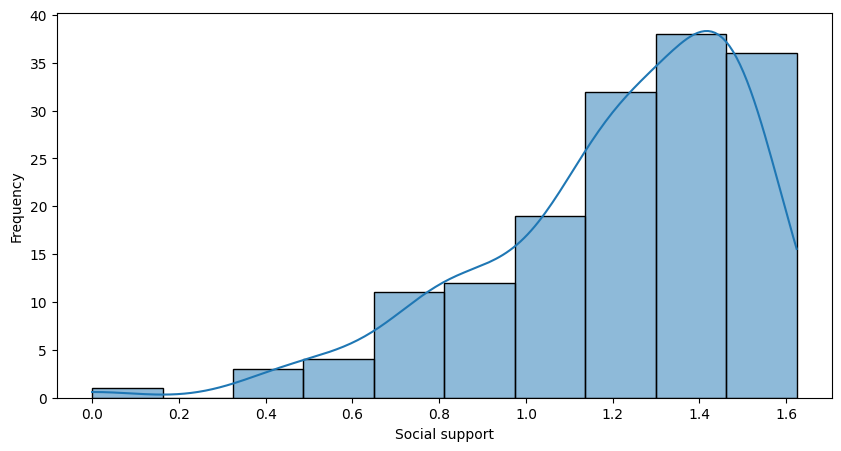

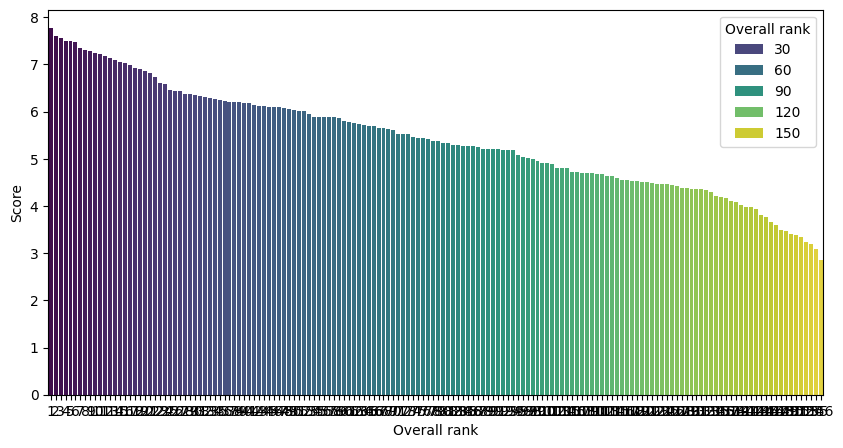

In [56]:
dataframe_task4 = pd.read_csv('Data/2019.csv')

def barplot(x1, y1):
    plt.figure(figsize=(10, 5))
    sb.barplot(x=x1, y=y1, data=dataframe_task4, hue=x1, palette='viridis')
    plt.ylabel(y1)
    plt.xlabel(x1)
    plt.show()

def hist(x):
    plt.figure(figsize=(10, 5))
    sb.histplot(dataframe_task4[x], bins=10, kde=True)
    plt.xlabel(x)
    plt.ylabel('Frequency')
    plt.show()

hist('Social support')
barplot(x1='Overall rank', y1='Score')

Задание 5: Проверка гипотез  
Сгенерируйте два шкалированных ряда данных и проверьте статистически значимые различия между ними с использованием t-теста. Визуализируйте эти данные и результаты своего анализа.

T-statistic: 5.383245869828983
P-value: 9.120185549328822e-08
Отвергаем нулевую гипозету, которая говорит что нет различий между группами


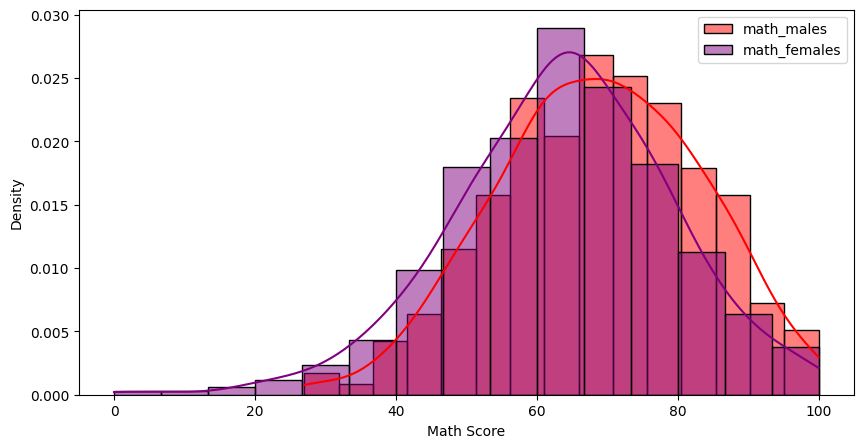

In [68]:
dataframe_task5 = pd.read_csv('Data/StudentsPerformance.csv')

math_males = dataframe_task5[dataframe_task5['gender'] == 'male']['math score']
math_females = dataframe_task5[dataframe_task5['gender'] == 'female']['math score']

t_stat, p_value = stats.ttest_ind(math_males, math_females)

print(f"T-statistic: {t_stat}") # Разница между средними значениями двух групп 
print(f"P-value: {p_value}") # Вероятность, что наблюдаемая разница случайна

if p_value < 0.05:
    print("Отвергаем нулевую гипозету, которая говорит что нет различий между группами")
else:
    print("Подтверждаем нулевую гипозету, которая говорит что нет различий между группами")

plt.figure(figsize=(10, 5))
sb.histplot(math_males, color='red', label='math_males', kde=True, bins=15, stat="density")
sb.histplot(math_females, color='purple', label='math_females', kde=True, bins=15, stat="density")
plt.xlabel('Math Score')
plt.ylabel('Density')
plt.legend()
plt.show()